In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis
df = pd.read_csv(r"C:\Users\maxpi\Documents\data_ironhack\lab w5\amz_uk_price_prediction_dataset.csv")


In [4]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab['Total'] = crosstab.sum(axis=1)
crosstab['BestSeller_Rate'] = crosstab[1] / crosstab['Total']

crosstab_sorted = crosstab.sort_values(by='BestSeller_Rate', ascending=False)

print(crosstab_sorted[['BestSeller_Rate']])

isBestSeller                    BestSeller_Rate
category                                       
Grocery                                0.058135
Smart Home Security & Lighting         0.057692
Health & Personal Care                 0.057686
Mobile Phone Accessories               0.042471
Power & Hand Tools                     0.035339
...                                         ...
Bedding Collections                    0.000000
CPUs                                   0.000000
CD, Disc & Tape Players                0.000000
Blank Media Cases & Wallets            0.000000
eBook Readers & Accessories            0.000000

[296 rows x 1 columns]


In [6]:
from scipy.stats import chi2_contingency

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['category'], df['isBestSeller']))

print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}, DoF: {dof}")

Chi2: 36540.20, p-value: 0.0000, DoF: 295


In [7]:
n = df.shape[0]
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.0706


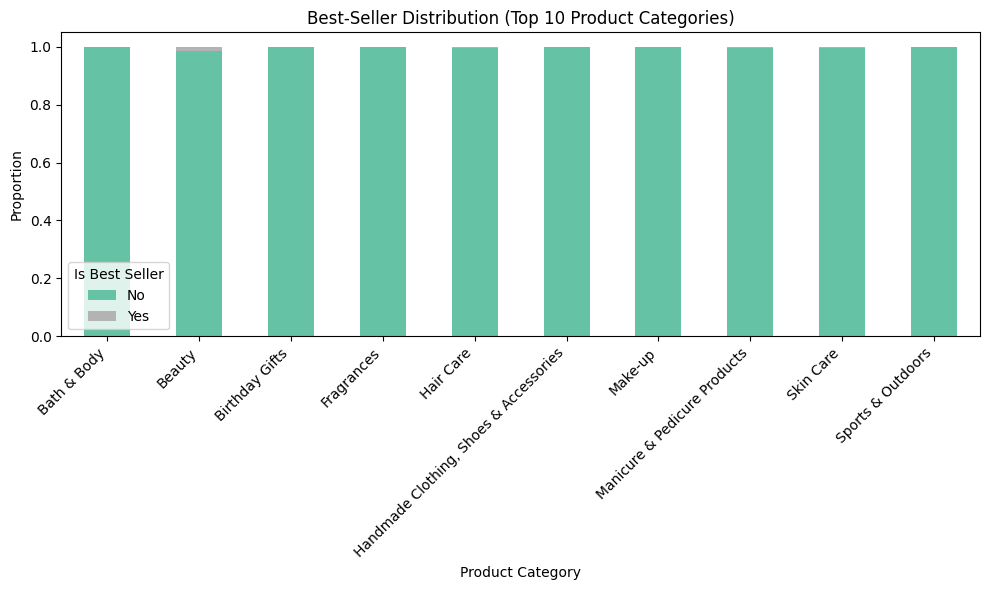

In [13]:
top_10_categories = df['category'].value_counts().nlargest(10).index

filtered_df = df[df['category'].isin(top_10_categories)]

crosstab_plot = pd.crosstab(filtered_df['category'], filtered_df['isBestSeller'], normalize='index')

# Step 4: Plot
crosstab_plot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Best-Seller Distribution (Top 10 Product Categories)')
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.legend(title='Is Best Seller', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
print(df['isBestSeller'].value_counts())


isBestSeller
False    2435671
True        7980
Name: count, dtype: int64


In [12]:
df['isBestSeller'] = df['isBestSeller'].astype(int)


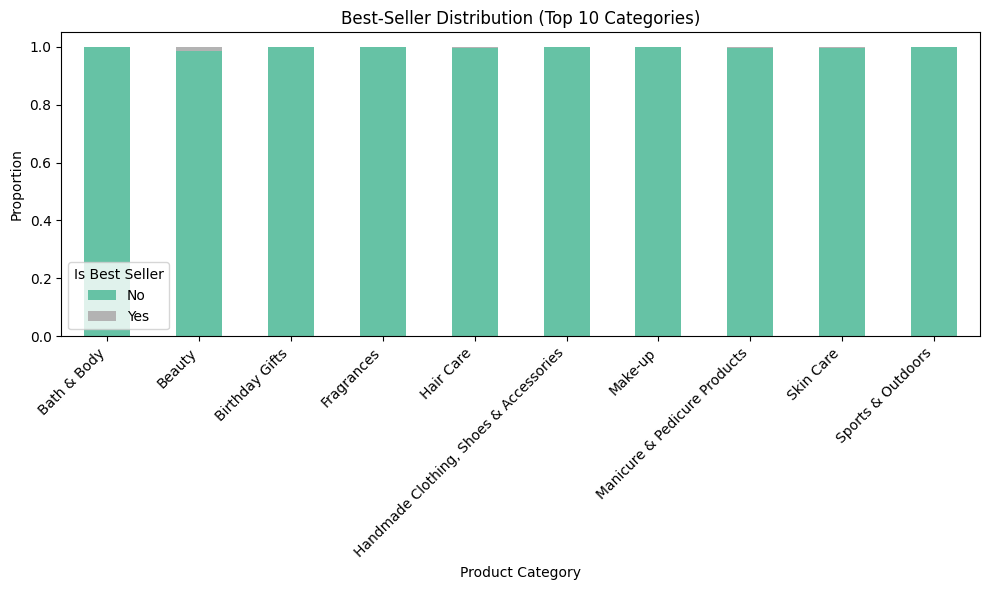

In [15]:
# Get top 10 categories by count
top_10 = df['category'].value_counts().nlargest(10).index

# Filter dataframe
top_df = df[df['category'].isin(top_10)]

# Create crosstab (normalized per row)
crosstab = pd.crosstab(top_df['category'], top_df['isBestSeller'], normalize='index')

# Ensure columns 0 and 1 exist even if one value is missing
for col in [0, 1]:
    if col not in crosstab.columns:
        crosstab[col] = 0

# Sort columns to ensure [0, 1] order
crosstab = crosstab[[0, 1]]

# Plot
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Best-Seller Distribution (Top 10 Categories)')
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.legend(title='Is Best Seller', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

C:\Users\maxpi\AppData\Local\Temp\ipykernel_26036\1788786779.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df_top20, x='category', y='price', inner='quartile', scale='width')


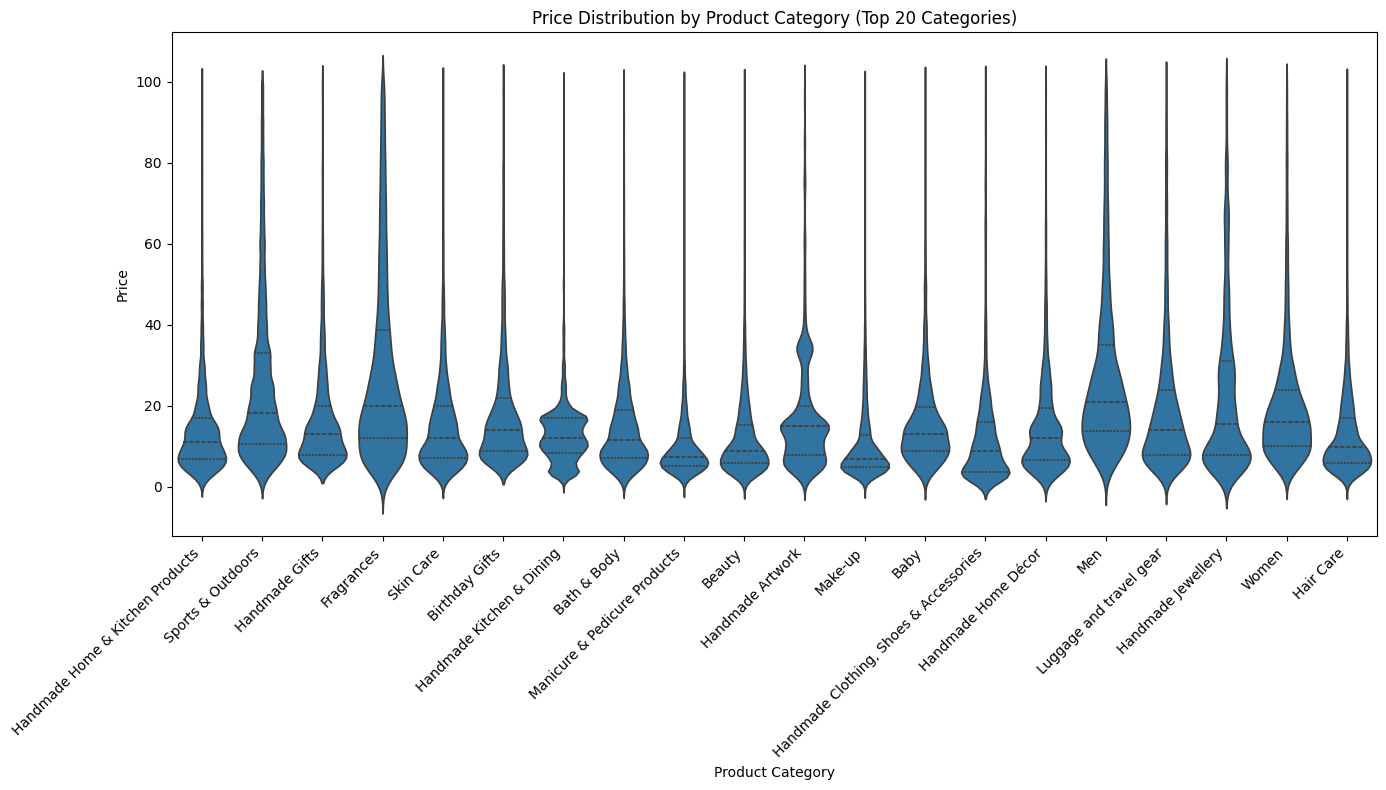

Category with highest median price: Desktop PCs
category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92
Name: price, dtype: float64


In [19]:
top_20_categories = df_no_outliers['category'].value_counts().nlargest(20).index
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top20, x='category', y='price', inner='quartile', scale='width')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Product Category (Top 20 Categories)')
plt.ylabel('Price')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

# Find product category with highest median price (no filter)
median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
print("Category with highest median price:", median_prices.index[0])
print(median_prices.head(5))

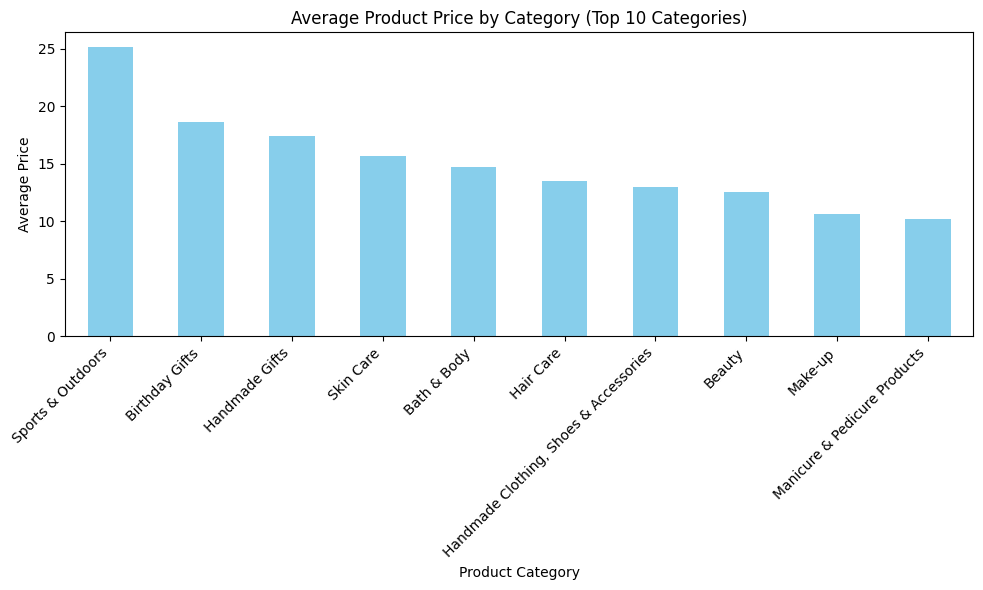

Category with highest average price: Motherboards
category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509
Name: price, dtype: float64


In [20]:
top_10_categories = df_no_outliers['category'].value_counts().nlargest(10).index
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Calculate average price per category
avg_prices = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Product Price by Category (Top 10 Categories)')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Highest average price category overall (no filter)
overall_avg_prices = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)
print("Category with highest average price:", overall_avg_prices.index[0])
print(overall_avg_prices.head(5))

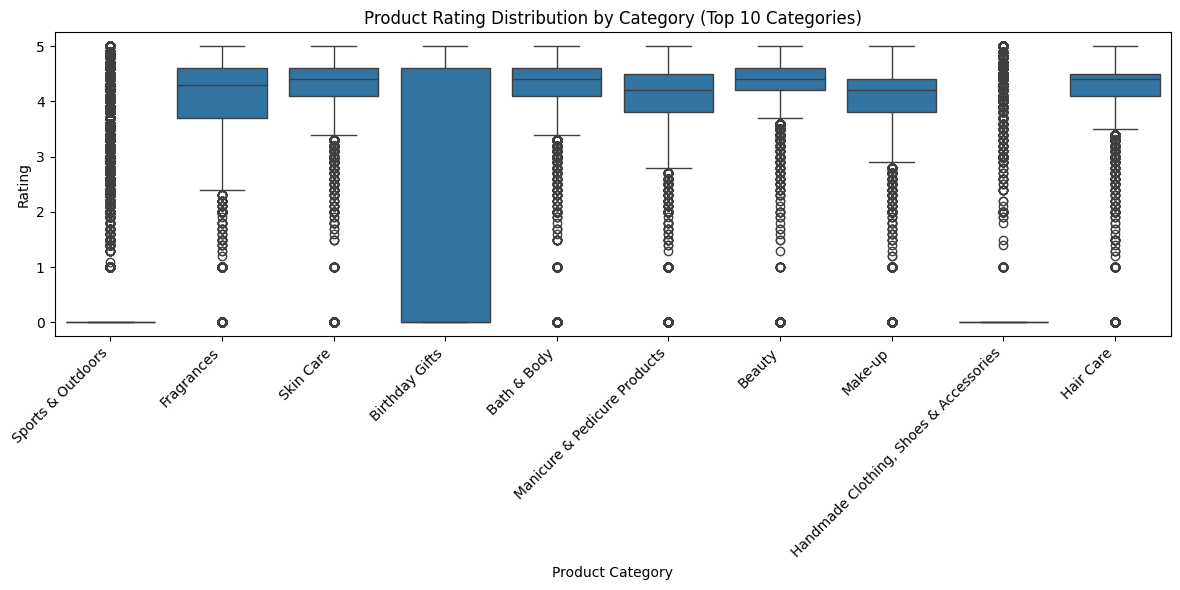

Category with highest median rating: Computer Memory
category
Computer Memory                 4.7
CPUs                            4.6
Building & Construction Toys    4.6
Laptop Accessories              4.6
Hobbies                         4.6
Name: stars, dtype: float64


In [22]:
top_10_rating_categories = df['category'].value_counts().nlargest(10).index
df_rating_top10 = df[df['category'].isin(top_10_rating_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rating_top10, x='category', y='stars')
plt.xticks(rotation=45, ha='right')
plt.title('Product Rating Distribution by Category (Top 10 Categories)')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Find category with highest median rating overall (no filter)
median_ratings = df.groupby('category')['stars'].median().sort_values(ascending=False)
print("Category with highest median rating:", median_ratings.index[0])
print(median_ratings.head(5))

In [24]:
correlation = df[['price', 'stars']].corr().loc['price', 'stars']
print(f"Correlation between price and rating: {correlation:.4f}")

Correlation between price and rating: -0.1249


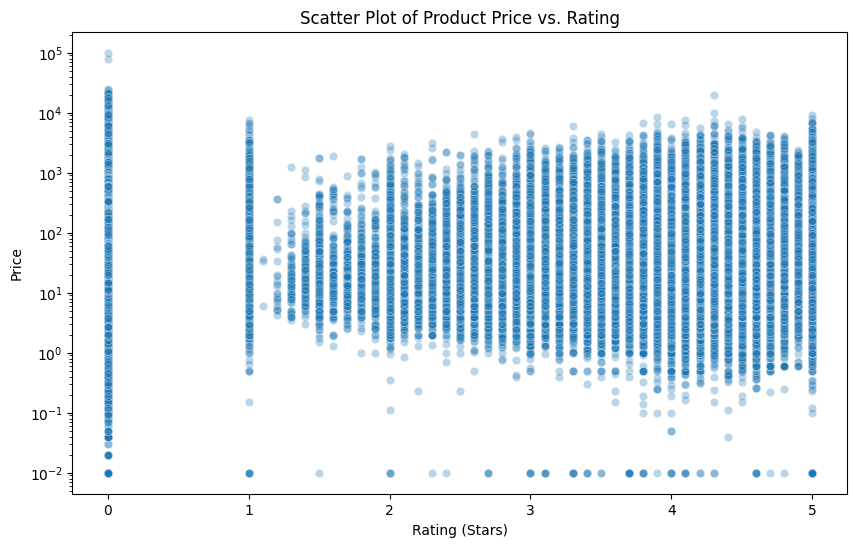

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stars', y='price', alpha=0.3)  # alpha for transparency due to large data
plt.title('Scatter Plot of Product Price vs. Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Price')
plt.yscale('log')  # Log scale to handle wide range in price for better visualization
plt.show()

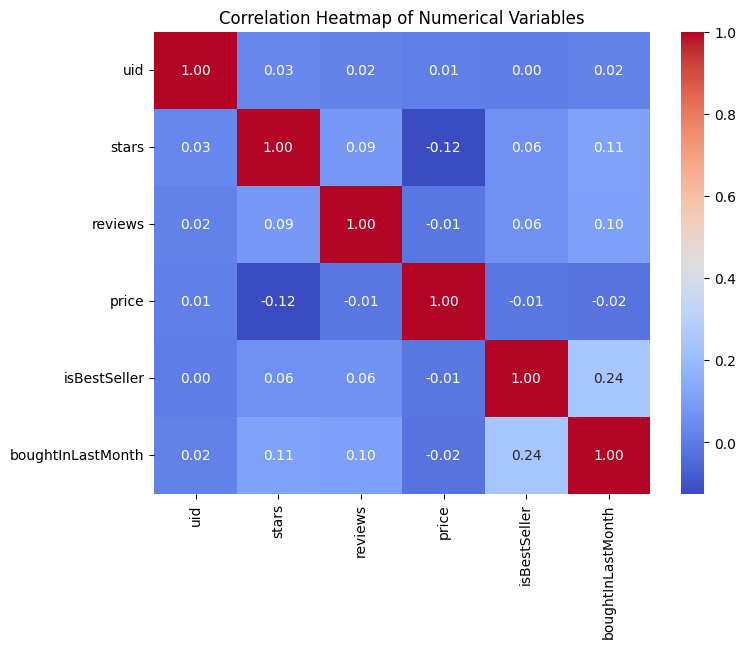

In [27]:
plt.figure(figsize=(8, 6))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

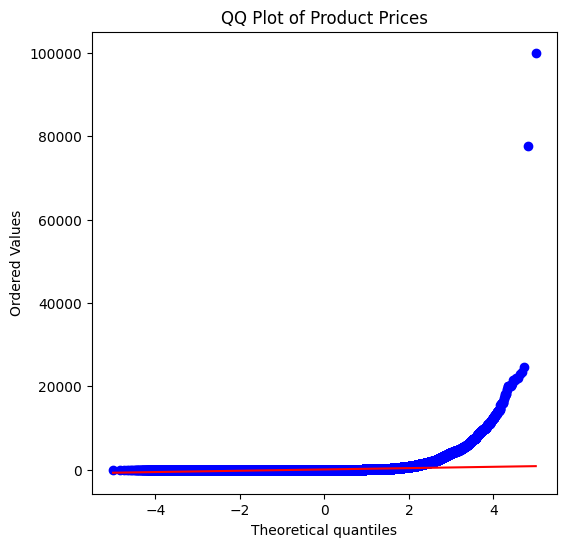

In [29]:
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.show()